In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



2025-10-04 14:22:16.557858: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-04 14:22:16.866733: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-04 14:22:18.000674: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
df=pd.read_csv("exoK2Data.csv",skiprows=38)

df=df.drop(columns=["kepoi_name","kepler_name","koi_tce_delivname","loc_rowid","kepid"])
df=df.dropna()
print(df.isna().sum())
df


koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
dtype: int64


,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num
0,CANDIDATE,1.000,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,19.5,-19.5,2.26,0.26,-0.15,93.59,29.45,-16.65,35.8,1.0
1,CANDIDATE,0.969,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,35.5,-35.5,2.83,0.32,-0.19,9.11,2.87,-1.62,25.8,2.0
2,CANDIDATE,0.000,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,171.0,-171.0,14.60,3.92,-1.31,39.30,31.04,-10.49,76.3,1.0
3,FALSE POSITIVE,0.000,0,1,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,12.8,-12.8,33.46,8.50,-2.83,891.96,668.95,-230.35,505.6,1.0
4,CANDIDATE,1.000,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,16.9,-16.9,2.75,0.88,-0.35,926.16,874.33,-314.24,40.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,0,1,1,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,4.6,-4.6,29.35,7.70,-2.57,4500.53,3406.38,-1175.26,453.3,1.0
9560,CANDIDATE,0.497,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,5.4,-5.4,0.72,0.24,-0.08,1585.81,1537.86,-502.22,10.6,1.0
9561,FALSE POSITIVE,0.021,0,0,1,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,14.7,-14.7,1.07,0.36,-0.11,5713.41,5675.74,-1836.94,12.3,1.0
9562,CANDIDATE,0.092,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,...,52.7,-52.7,19.30,0.55,-4.68,22.68,2.07,-10.95,14.0,1.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

X= df[['koi_period','koi_depth','koi_duration','koi_model_snr','koi_insol']].values
y=df['koi_pdisposition'].values

encoder=LabelEncoder()
y=encoder.fit_transform(y)

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [4]:
from tensorflow.keras import layers,models

model= models.Sequential(
    [
        layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64,activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32,activation='relu'),
        layers.Dense(2,activation='softmax')
    ])

/home/anmol/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1759567941.691719    5001 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2140 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,834 (175.13 KB)

 Trainable params: 44,834 (175.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=1000,batch_size=32,verbose=1)

Epoch 1/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8460 - loss: 0.3553 - val_accuracy: 0.8300 - val_loss: 0.4268
Epoch 2/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.3538 - val_accuracy: 0.8435 - val_loss: 0.4198
Epoch 3/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.3673 - val_accuracy: 0.8292 - val_loss: 0.4114
Epoch 4/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.3551 - val_accuracy: 0.8419 - val_loss: 0.4094
Epoch 5/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.3590 - val_accuracy: 0.8443 - val_loss: 0.4022
Epoch 6/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3538 - val_accuracy: 0.8364 - val_loss: 0.4177
Epoch 7/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.3530 - val_accuracy: 0.8395 - val_loss: 0.4209
Epoch 8/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.3501 -

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.3571 - val_accuracy: 0.8269 - val_loss: 0.4284
Epoch 51/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.3578 - val_accuracy: 0.8379 - val_loss: 0.4131
Epoch 52/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8412 - loss: 0.3556 - val_accuracy: 0.8403 - val_loss: 0.4104
Epoch 53/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3538 - val_accuracy: 0.8364 - val_loss: 0.4122
Epoch 54/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.3528 - val_accuracy: 0.8419 - val_loss: 0.4174
Epoch 55/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.3556 - val_accuracy: 0.8387 - val_loss: 0.4100
Epoch 56/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.3547 - val_accuracy: 0.8364 - val_loss: 0.4142
Epoch 57/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8462 - loss: 0.3554 - val_ac

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3557 - val_accuracy: 0.8443 - val_loss: 0.4036
Epoch 100/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3571 - val_accuracy: 0.8403 - val_loss: 0.4134
Epoch 101/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8444 - loss: 0.3583 - val_accuracy: 0.8395 - val_loss: 0.4161
Epoch 102/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3489 - val_accuracy: 0.8316 - val_loss: 0.4128
Epoch 103/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3497 - val_accuracy: 0.8324 - val_loss: 0.4159
Epoch 104/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8440 - loss: 0.3553 - val_accuracy: 0.8348 - val_loss: 0.4104
Epoch 105/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.3521 - val_accuracy: 0.8308 - val_loss: 0.4179
Epoch 106/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3535 -

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8454 - loss: 0.3515 - val_accuracy: 0.8308 - val_loss: 0.4178
Epoch 149/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8464 - loss: 0.3477 - val_accuracy: 0.8379 - val_loss: 0.4209
Epoch 150/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8438 - loss: 0.3540 - val_accuracy: 0.8221 - val_loss: 0.4325
Epoch 151/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.3638 - val_accuracy: 0.8316 - val_loss: 0.4215
Epoch 152/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8474 - loss: 0.3536 - val_accuracy: 0.8395 - val_loss: 0.4105
Epoch 153/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8484 - loss: 0.3562 - val_accuracy: 0.8348 - val_loss: 0.4124
Epoch 154/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 0.3543 - val_accuracy: 0.8387 - val_loss: 0.4138
Epoch 155/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.3497 -

In [7]:
loss,acc=model.evaluate(X_test,y_test,verbose=0)
print(f"test accuracy:{acc:.2f}")

test accuracy:0.85


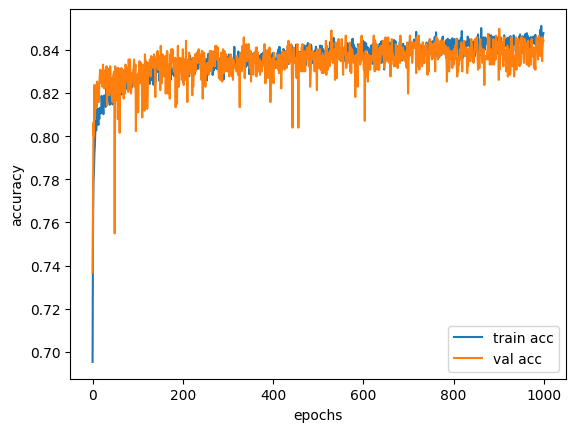

In [8]:
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [16]:
model.predict(X_test[[1]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.83756375, 0.16243625]], dtype=float32)

In [10]:
## df

In [11]:
model.save("exoplanet_model.h5");


In [12]:
import joblib
joblib.dump(scaler,"scaler.pkl")
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']

In [13]:
df

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num
0,CANDIDATE,1.000,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,19.5,-19.5,2.26,0.26,-0.15,93.59,29.45,-16.65,35.8,1.0
1,CANDIDATE,0.969,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,35.5,-35.5,2.83,0.32,-0.19,9.11,2.87,-1.62,25.8,2.0
2,CANDIDATE,0.000,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,171.0,-171.0,14.60,3.92,-1.31,39.30,31.04,-10.49,76.3,1.0
3,FALSE POSITIVE,0.000,0,1,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,12.8,-12.8,33.46,8.50,-2.83,891.96,668.95,-230.35,505.6,1.0
4,CANDIDATE,1.000,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,16.9,-16.9,2.75,0.88,-0.35,926.16,874.33,-314.24,40.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,0,1,1,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,4.6,-4.6,29.35,7.70,-2.57,4500.53,3406.38,-1175.26,453.3,1.0
9560,CANDIDATE,0.497,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,5.4,-5.4,0.72,0.24,-0.08,1585.81,1537.86,-502.22,10.6,1.0
9561,FALSE POSITIVE,0.021,0,0,1,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,14.7,-14.7,1.07,0.36,-0.11,5713.41,5675.74,-1836.94,12.3,1.0
9562,CANDIDATE,0.092,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,...,52.7,-52.7,19.30,0.55,-4.68,22.68,2.07,-10.95,14.0,1.0


In [17]:
X_test[[1]]

array([[ 0.2999076 , -0.30939218,  1.01941306, -0.31627379, -0.04546986]])

In [15]:
df

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num
0,CANDIDATE,1.000,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,19.5,-19.5,2.26,0.26,-0.15,93.59,29.45,-16.65,35.8,1.0
1,CANDIDATE,0.969,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,35.5,-35.5,2.83,0.32,-0.19,9.11,2.87,-1.62,25.8,2.0
2,CANDIDATE,0.000,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,171.0,-171.0,14.60,3.92,-1.31,39.30,31.04,-10.49,76.3,1.0
3,FALSE POSITIVE,0.000,0,1,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,12.8,-12.8,33.46,8.50,-2.83,891.96,668.95,-230.35,505.6,1.0
4,CANDIDATE,1.000,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,16.9,-16.9,2.75,0.88,-0.35,926.16,874.33,-314.24,40.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.000,0,1,1,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,4.6,-4.6,29.35,7.70,-2.57,4500.53,3406.38,-1175.26,453.3,1.0
9560,CANDIDATE,0.497,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,5.4,-5.4,0.72,0.24,-0.08,1585.81,1537.86,-502.22,10.6,1.0
9561,FALSE POSITIVE,0.021,0,0,1,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,14.7,-14.7,1.07,0.36,-0.11,5713.41,5675.74,-1836.94,12.3,1.0
9562,CANDIDATE,0.092,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,...,52.7,-52.7,19.30,0.55,-4.68,22.68,2.07,-10.95,14.0,1.0
